### Problem Statement

Game Streamer Agency are committed to help streamers increase their revenues by leveraging the rich source of streaming data to provide actionable insights. In this problem, we want to learn whether certain features of streamers will make them more or less likely to receive stars from their audience, in this case **PaidStarPerWatchedHour is our dependent variable.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv('Maingames_DS_dataset.csv', na_values = ["-"])
df

,Unnamed: 0,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,ID,Male,MLBB,96751,104,0.004113,0.663442,0.718679,0.288008,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,1,ID,Male,8 Ball Pool,4781,174,0.002855,0.543255,0.427887,0.430609,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,2,ID,Female,Free Fire - Battlegrounds,68246,83,0.003007,0.527279,0.399873,0.753009,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,3,ID,Male,MLBB,142037,127,0.005171,0.677222,0.603534,0.407923,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,4,ID,Male,Free Fire - Battlegrounds,15416,86,0.001213,0.238194,0.543285,0.392993,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,942,VN,Male,PUBG,330969,182,0.001082,0.534637,0.399738,0.548851,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,943,VN,Male,MU Online,33450,102,0.000082,0.664025,0.597952,0.578953,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,944,VN,Male,Age of Empires,29000,103,0.000724,0.561336,0.378814,0.547942,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,945,VN,Female,PUBG,19771,143,0.000433,0.600844,0.364150,0.516497,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


In [3]:
# drop the first column 'Unnamed: 0' because that is unnecessary
df =df.drop(columns='Unnamed: 0')

In [4]:
# Dataset description such as data types, missing value, unique value, unique sample
Desc = []
for i in df.columns:
    Desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(Desc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Country,object,0,0.00,3,"[ID, PH]"
1,Gender,object,3,0.48,2,"[Male, Female]"
2,Game,object,7,1.11,64,"[The Warriors, Point Blank Indonesia]"
3,Total Follower,object,3,0.48,627,"[14277, 26011]"
4,Broadcast Hours,int64,0,0.00,173,"[163, 175]"
...,...,...,...,...,...,...
121,Character_Facet_Cont_Cautiousness,float64,0,0.00,515,"[0.356794712, 0.634173068]"
122,Role_Curator,float64,0,0.00,509,"[0.3119343189999999, 0.436887147]"
123,Personal_Values_Cont_Conservation,float64,0,0.00,515,"[0.304440892, 0.308150218]"
124,Self_Esteem_Cont_SELevelIntelligence,float64,0,0.00,506,"[0.812904631, 0.7895841159999999]"


##### Check for missing value

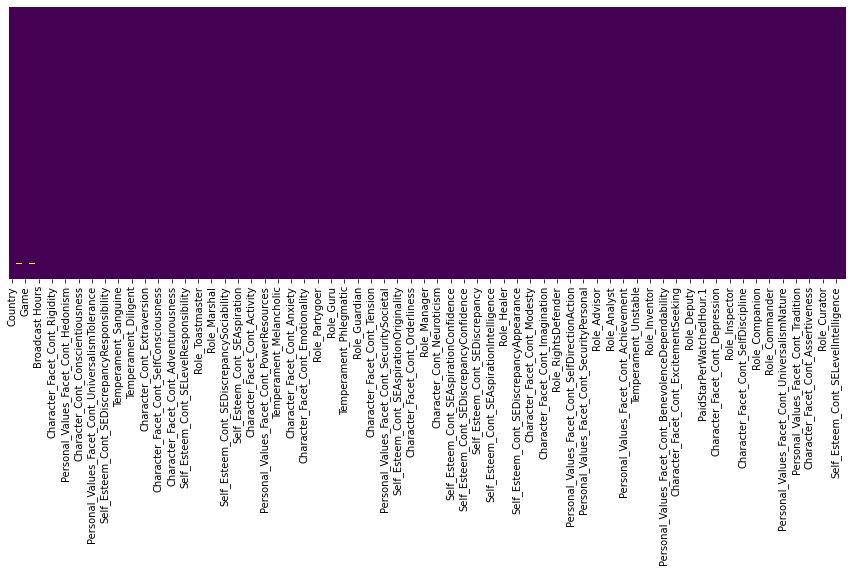

In [5]:
plt.figure(figsize = (15, 5))
sns.heatmap(df.isna(), cmap = 'viridis',yticklabels = False, cbar= False)
plt.show()

In [5]:
temp = pd.DataFrame(df.isna().sum())
temp.columns = ["Missing Values"]
temp.iloc[temp["Missing Values"].values > 0, :]

,Missing Values
Gender,3
Game,7
Total Follower,3
PaidStarPerWatchedHour,2
PaidStarPerWatchedHour.1,2


There is not much of missing values compare to the total data so we could drop it. Also we found out that there is a similar feature between `PaidStarPerWatchedHour` and `PaidStarPerWatchedHour.1`.

Check the similarity between `PaidStarPerWatchedHour` and `PaidStarPerWatchedHour.1` feature.

In [18]:
df[["PaidStarPerWatchedHour", "PaidStarPerWatchedHour.1"]]

,PaidStarPerWatchedHour,PaidStarPerWatchedHour.1
0,0.004113,0.004113
1,0.002855,0.002855
2,0.003007,0.003007
3,0.005171,0.005171
4,0.001213,0.001213
...,...,...
626,0.001082,0.001082
627,0.000082,0.000082
628,0.000724,0.000724
629,0.000433,0.000433


As we can see it looks like the feature is similar so we can drop one of them.

In [6]:
df = df.drop(columns='PaidStarPerWatchedHour.1')

In [7]:
# Drop rows with missing values
df = df.dropna()

##### Check data types

In [7]:
df.dtypes[df.dtypes == "object"]

Country           object
Gender            object
Game              object
Total Follower    object
MBTI_grouped      object
dtype: object

In [8]:
df['Total Follower']

0       96751
1        4781
2       68246
3      142037
4       15416
        ...  
626    330969
627     33450
628     29000
629     19771
630    515000
Name: Total Follower, Length: 622, dtype: object

In [9]:
df['Total Follower'] = pd.to_numeric(df['Total Follower'])

ValueError: Unable to parse string "250,98" at position 568

In [10]:
df[df['Total Follower'] == '250,98']

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
576,VN,Male,PUBG,"250,98",125,0.00546,0.85509,0.803543,0.520915,0.441138,...,0.433396,0.298787,0.36134,0.609857,0.697572,0.745497,0.189331,0.308224,0.79402,0.0


In [8]:
df.loc[df["Total Follower"].values == "250,98", "Total Follower"] = 250.98

In [9]:
df['Total Follower'] = pd.to_numeric(df['Total Follower'])

In [13]:
df.dtypes[df.dtypes == "object"]

Country         object
Gender          object
Game            object
MBTI_grouped    object
dtype: object

In [8]:
df

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,ID,Male,MLBB,96751.0,104,0.004113,0.663442,0.718679,0.288008,0.471456,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,ID,Male,8 Ball Pool,4781.0,174,0.002855,0.543255,0.427887,0.430609,0.493514,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,ID,Female,Free Fire - Battlegrounds,68246.0,83,0.003007,0.527279,0.399873,0.753009,0.472405,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,ID,Male,MLBB,142037.0,127,0.005171,0.677222,0.603534,0.407923,0.467787,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,ID,Male,Free Fire - Battlegrounds,15416.0,86,0.001213,0.238194,0.543285,0.392993,0.583099,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,VN,Male,PUBG,330969.0,182,0.001082,0.534637,0.399738,0.548851,0.513117,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,VN,Male,MU Online,33450.0,102,0.000082,0.664025,0.597952,0.578953,0.485526,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,VN,Male,Age of Empires,29000.0,103,0.000724,0.561336,0.378814,0.547942,0.567108,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,VN,Female,PUBG,19771.0,143,0.000433,0.600844,0.364150,0.516497,0.685349,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


In [10]:
temp = pd.DataFrame(df.isna().sum())
temp.columns = ["Missing Values"]
temp.iloc[temp["Missing Values"].values > 0, :]

,Missing Values


In [11]:
def cek_outliers(tabel,col):
    Q1 = tabel[col].describe()['25%']
    Q3 = tabel[col].describe()['75%']
    IQR = Q3-Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    tabel_outliers = df[(df[col] < LF) | (df[col] > UF)]
    if len(tabel_outliers) == 0:
           return "No Outliers"
    else:
           return tabel_outliers

In [12]:
outlier = cek_outliers(df,'PaidStarPerWatchedHour')
outlier

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
14,ID,Male,PUBG,87966.0,190,0.032043,0.621755,0.569119,0.461935,0.436270,...,0.410726,0.431379,0.321619,0.645063,0.504469,0.527296,0.291606,0.302789,0.817305,0.125
15,ID,Male,MLBB,12504.0,92,0.027518,0.703569,0.521671,0.642299,0.301722,...,0.392988,0.455793,0.312279,0.684837,0.602630,0.590487,0.241680,0.305100,0.740746,0.625
27,ID,Female,PUBG,84307.0,82,0.026959,0.451838,0.528659,0.538364,0.681331,...,0.556217,0.409105,0.378597,0.518774,0.379844,0.368337,0.447455,0.312815,0.761515,0.625
40,ID,Female,PUBG,26916.0,122,0.020750,0.438498,0.265146,0.651076,0.368995,...,0.416205,0.258968,0.248378,0.502627,0.415094,0.412711,0.043685,0.313661,0.764788,0.125
56,ID,Male,PUBG,9595.0,164,0.032458,0.486734,0.620689,0.326851,0.600459,...,0.467153,0.336921,0.510962,0.718336,0.318067,0.412453,0.601515,0.307968,0.869145,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,VN,Male,League of Legends,324584.0,89,0.025756,0.668100,0.676650,0.520932,0.467554,...,0.404155,0.500324,0.401625,0.621194,0.639010,0.702206,0.268628,0.295348,0.778314,0.500
571,VN,Female,League of Legends,18062.0,114,0.026172,0.561336,0.378814,0.547942,0.567108,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
581,VN,Male,League of Legends,44611.0,236,0.021403,0.664025,0.597952,0.578953,0.485526,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
613,VN,Male,League of Legends,130787.0,163,0.023187,0.722006,0.715103,0.550982,0.421625,...,0.450039,0.615096,0.422367,0.643170,0.449681,0.470145,0.185791,0.313157,0.838289,0.625


In [13]:
df = df[~df['PaidStarPerWatchedHour'].isin(outlier['PaidStarPerWatchedHour'])]
df

,Country,Gender,Game,Total Follower,Broadcast Hours,PaidStarPerWatchedHour,Character_Facet_Cont_Rigidity,Character_Facet_Cont_AchievementStriving,Personal_Values_Facet_Cont_Hedonism,Character_Facet_Cont_Dutifulness,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,ID,Male,MLBB,96751.0,104,0.004113,0.663442,0.718679,0.288008,0.471456,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,ID,Male,8 Ball Pool,4781.0,174,0.002855,0.543255,0.427887,0.430609,0.493514,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,ID,Female,Free Fire - Battlegrounds,68246.0,83,0.003007,0.527279,0.399873,0.753009,0.472405,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,ID,Male,MLBB,142037.0,127,0.005171,0.677222,0.603534,0.407923,0.467787,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,ID,Male,Free Fire - Battlegrounds,15416.0,86,0.001213,0.238194,0.543285,0.392993,0.583099,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,VN,Male,PUBG,330969.0,182,0.001082,0.534637,0.399738,0.548851,0.513117,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,VN,Male,MU Online,33450.0,102,0.000082,0.664025,0.597952,0.578953,0.485526,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,VN,Male,Age of Empires,29000.0,103,0.000724,0.561336,0.378814,0.547942,0.567108,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,VN,Female,PUBG,19771.0,143,0.000433,0.600844,0.364150,0.516497,0.685349,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


In [14]:
import dython
from dython.nominal import associations, cramers_v, theils_u, correlation_ratio

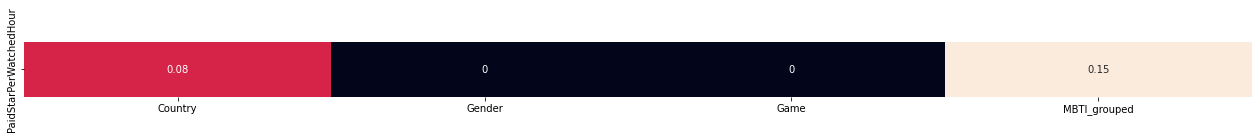

In [19]:
assoc_cr = []
col = ['Country', 'Gender', 'Game', 'MBTI_grouped']
for i in col: 
    assoc = round(cramers_v(df['PaidStarPerWatchedHour'], df[i]), 2) 
    assoc_cr.append(assoc)
    
df_cr = pd.DataFrame(data = [assoc_cr], columns = col, index=['PaidStarPerWatchedHour'])

plt.figure(figsize=(22, 1))
sns.heatmap(df_cr, annot = True, cbar=False)
plt.show()

In [15]:
df.to_csv('maingames.csv')

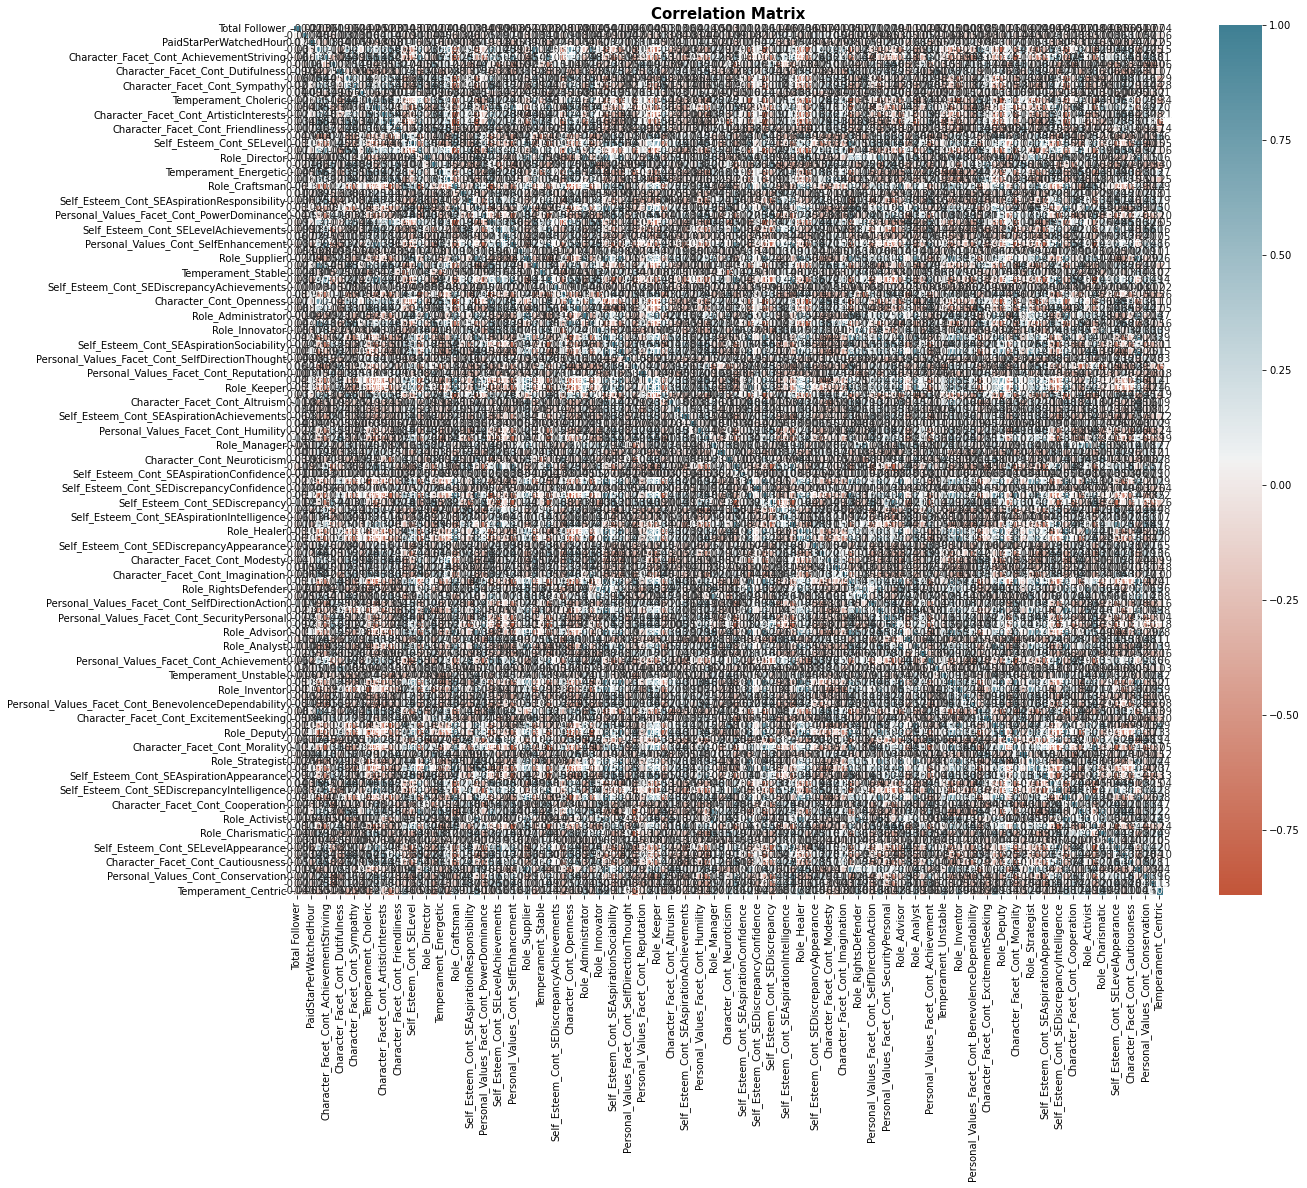

In [21]:
# Correlation matrix
plt.figure(figsize=(20,16))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

In [16]:
cat_columns = ["Gender", "Country", "Game", "MBTI_grouped"]

In [17]:
cat_dummy = pd.get_dummies(df[cat_columns])

In [18]:
cat_dummy

,Gender_Female,Gender_Male,Country_ID,Country_PH,Country_VN,Game_8 Ball Pool,Game_Age of Empires,Game_Agge of Empires,Game_Apex Legends,Game_Arena of Valor,...,Game_Yakuza: Kiwami 2,Game_eFootball PES 2020,MBTI_grouped_ENF,MBTI_grouped_ENT,MBTI_grouped_ESF,MBTI_grouped_EST,MBTI_grouped_INF,MBTI_grouped_INT,MBTI_grouped_ISF,MBTI_grouped_IST
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
627,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
628,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
629,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df_dummy = pd.concat([cat_dummy, df.drop(cat_columns, axis=1)], axis=1)
df_dummy

,Gender_Female,Gender_Male,Country_ID,Country_PH,Country_VN,Game_8 Ball Pool,Game_Age of Empires,Game_Agge of Empires,Game_Apex Legends,Game_Arena of Valor,...,Personal_Values_Facet_Cont_UniversalismNature,Role_Charismatic,Personal_Values_Facet_Cont_Tradition,Self_Esteem_Cont_SELevelAppearance,Character_Facet_Cont_Assertiveness,Character_Facet_Cont_Cautiousness,Role_Curator,Personal_Values_Cont_Conservation,Self_Esteem_Cont_SELevelIntelligence,Temperament_Centric
0,0,1,1,0,0,0,0,0,0,0,...,0.523116,0.408444,0.318747,0.684412,0.494384,0.751974,0.524306,0.299052,0.803920,0.625
1,0,1,1,0,0,1,0,0,0,0,...,0.444493,0.407624,0.382594,0.635493,0.468738,0.571198,0.100202,0.304527,0.751291,0.125
2,1,0,1,0,0,0,0,0,0,0,...,0.581657,0.443453,0.325263,0.398686,0.515929,0.309322,0.070988,0.305975,0.759900,0.000
3,0,1,1,0,0,0,0,0,0,0,...,0.385822,0.408994,0.440821,0.703669,0.516412,0.535322,0.214652,0.298592,0.734010,0.000
4,0,1,1,0,0,0,0,0,0,0,...,0.582025,0.135650,0.405968,0.439668,0.586193,0.567604,0.324364,0.298716,0.814530,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0,1,0,0,1,0,0,0,0,0,...,0.568354,0.271178,0.399811,0.423934,0.402793,0.416404,0.171556,0.285894,0.762268,0.125
627,0,1,0,0,1,0,0,0,0,0,...,0.409843,0.668646,0.352585,0.755972,0.539407,0.640965,0.241956,0.303950,0.805624,0.625
628,0,1,0,0,1,0,1,0,0,0,...,0.594737,0.397342,0.341652,0.458656,0.412747,0.387027,0.418017,0.291648,0.742862,0.250
629,1,0,0,0,1,0,0,0,0,0,...,0.473707,0.332203,0.351585,0.603314,0.401816,0.461684,0.229152,0.296722,0.722012,0.125


In [25]:
X = df_dummy.drop(columns=['PaidStarPerWatchedHour'])
y = df_dummy['PaidStarPerWatchedHour']

In [21]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [37]:
xgb = XGBRegressor(random_state = 0)
xgb.fit(X, y)

y_pred = xgb.predict(X)
print("Training Data")
print("MSE :", mean_squared_error(y, y_pred))
print("RMSE :", mean_squared_error(y, y_pred, squared = False))
print("MAE :", mean_absolute_error(y, y_pred))
print("R2 :", r2_score(y, y_pred))

Training Data
MSE : 7.101135232629521e-07
RMSE : 0.0008426823382882497
MAE : 0.0005232003038477055
R2 : 0.93998419051727


In [39]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(X, y)

y_pred = rf.predict(X)
print("Training Data")
print("MSE :", mean_squared_error(y, y_pred))
print("RMSE :", mean_squared_error(y, y_pred, squared = False))
print("MAE :", mean_absolute_error(y, y_pred))
print("R2 :", r2_score(y, y_pred))

Training Data
MSE : 1.4920859884233222e-06
RMSE : 0.0012215097168763423
MAE : 0.0009314874774430519
R2 : 0.8738951653792045


In [62]:
importance = xgb.feature_importances_
importance = pd.DataFrame({
    "feature": X.columns,
    "importance": importance
})

importance.sort_values(by = 'importance', ascending = False).head()

,feature,importance
187,Character_Facet_Cont_Assertiveness,0.04
189,Role_Curator,0.03
159,Personal_Values_Cont_SelfTranscendence,0.02
94,Role_Craftsman,0.02
182,Role_Activist,0.02
